# Image Processing Project
In this project we are basically just accepting the images of animals of 2 classes(cats and dogs) and we are training a machine learning model using the given datasets and in the end we are going to see the accuracy of our prediction model. 

Project creators-Siddharth Shukla 
                 Prajwal Dubey

# 1-Importing required packages and showing the images

In [69]:
import matplotlib.pyplot as plt
import cv2


%matplotlib inline

In [70]:
cat = cv2.imread('../Downloads/CATS_DOGS/CATS_DOGS/train/CAT/1.jpg')
cat = cv2.cvtColor(cat,cv2.COLOR_BGR2RGB)

In [71]:
type(cat)

numpy.ndarray

In [72]:
cat.shape

(281, 300, 3)

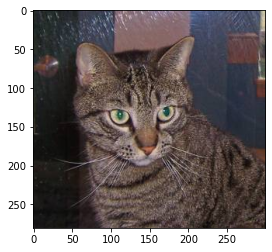

In [73]:
plt.imshow(cat)

In [74]:
dog = cv2.imread('../Downloads/CATS_DOGS/CATS_DOGS/train/Dog/3.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

In [75]:
type(dog)

numpy.ndarray

In [76]:
dog.shape

(375, 500, 3)

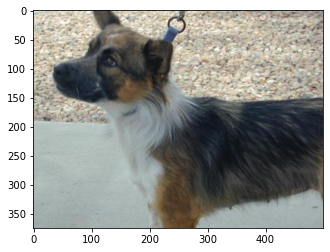

In [77]:
plt.imshow(dog)

# Preparations for Strengthening the model

In [78]:
from keras.preprocessing.image import ImageDataGenerator

In [79]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

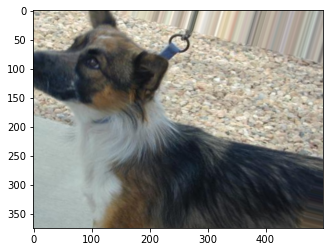

In [80]:
plt.imshow(image_gen.random_transform(dog))

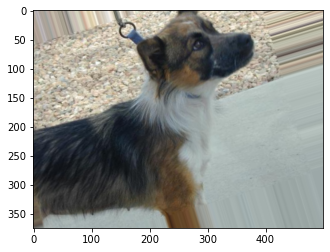

In [81]:
plt.imshow(image_gen.random_transform(dog))

In [82]:
image_gen.flow_from_directory('../Downloads/CATS_DOGS/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [83]:
image_gen.flow_from_directory('../Downloads/CATS_DOGS/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


# Creating the CNN(Convolution Neural Network)

In [84]:
image_s = (150,150,3)

In [85]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [86]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary, 0=cat , 1=dog
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [88]:
batch_size = 16

train_imagegen = image_gen.flow_from_directory('../Downloads/CATS_DOGS/CATS_DOGS/train',
                                               target_size=image_s[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [89]:
test_imagegen = image_gen.flow_from_directory('../Downloads/CATS_DOGS/CATS_DOGS/test',
                                               target_size=image_s[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [90]:
train_imagegen.class_indices

{'CAT': 0, 'DOG': 1}

# Fitting the model

In [91]:
result = model.fit_generator(train_imagegen,epochs=30,
                              steps_per_epoch=150,
                              validation_data=test_imagegen,
                             validation_steps=12)

Epoch 1/30
150/150 [==============================] - 107s 716ms/step - loss: 0.6951 - accuracy: 0.5250 - val_loss: 0.6963 - val_accuracy: 0.4896
Epoch 2/30
150/150 [==============================] - 97s 644ms/step - loss: 0.6908 - accuracy: 0.5217 - val_loss: 0.6870 - val_accuracy: 0.5000
Epoch 3/30
150/150 [==============================] - 100s 666ms/step - loss: 0.6911 - accuracy: 0.5358 - val_loss: 0.6877 - val_accuracy: 0.5885
Epoch 4/30
150/150 [==============================] - 89s 593ms/step - loss: 0.6843 - accuracy: 0.5758 - val_loss: 0.6805 - val_accuracy: 0.5781
Epoch 5/30
150/150 [==============================] - 86s 572ms/step - loss: 0.6779 - accuracy: 0.5667 - val_loss: 0.6758 - val_accuracy: 0.5781
Epoch 6/30
150/150 [==============================] - 93s 619ms/step - loss: 0.6828 - accuracy: 0.5738 - val_loss: 0.6330 - val_accuracy: 0.6667
Epoch 7/30
150/150 [==============================] - 81s 541ms/step - loss: 0.6682 - accuracy: 0.5925 - val_loss: 0.6676 - val_

C:\Users\siddh\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
C:\Users\siddh\anaconda3\lib\site-packages\PIL\TiffIma

150/150 [==============================] - 78s 519ms/step - loss: 0.6712 - accuracy: 0.5788 - val_loss: 0.6720 - val_accuracy: 0.6562
Epoch 9/30
150/150 [==============================] - 78s 523ms/step - loss: 0.6770 - accuracy: 0.5929 - val_loss: 0.6777 - val_accuracy: 0.5781
Epoch 10/30
150/150 [==============================] - 72s 480ms/step - loss: 0.6500 - accuracy: 0.6075 - val_loss: 0.6253 - val_accuracy: 0.6823
Epoch 11/30
150/150 [==============================] - 73s 484ms/step - loss: 0.6404 - accuracy: 0.6345 - val_loss: 0.6662 - val_accuracy: 0.6146
Epoch 12/30
150/150 [==============================] - 116s 776ms/step - loss: 0.6517 - accuracy: 0.6142 - val_loss: 0.6091 - val_accuracy: 0.6667
Epoch 13/30
150/150 [==============================] - 295s 2s/step - loss: 0.6647 - accuracy: 0.6002 - val_loss: 0.6367 - val_accuracy: 0.6667
Epoch 14/30
150/150 [==============================] - 101s 676ms/step - loss: 0.6382 - accuracy: 0.6317 - val_loss: 0.6086 - val_accuracy

# Evaluating the model

In [92]:
result.history['accuracy']

[0.5249999761581421,
 0.5216666460037231,
 0.5358333587646484,
 0.5758333206176758,
 0.5666666626930237,
 0.5737500190734863,
 0.5924999713897705,
 0.5787500143051147,
 0.5929166674613953,
 0.6075000166893005,
 0.6344625949859619,
 0.6141666769981384,
 0.6001672744750977,
 0.6316666603088379,
 0.654119610786438,
 0.644500195980072,
 0.659166693687439,
 0.6700125336647034,
 0.6909242868423462,
 0.6770833134651184,
 0.6937500238418579,
 0.699999988079071,
 0.7063990235328674,
 0.7009619474411011,
 0.7300000190734863,
 0.7099999785423279,
 0.7237499952316284,
 0.7137500047683716,
 0.710999608039856,
 0.7237499952316284]

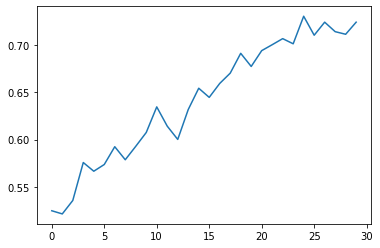

In [93]:
plt.plot(result.history['accuracy'])

In [94]:
train_imagegen.class_indices

{'CAT': 0, 'DOG': 1}

# Prediction

In [95]:
import numpy as np
from keras.preprocessing import image

dog_file = '../Downloads/CATS_DOGS/CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [96]:
import numpy as np
from keras.preprocessing import image

dog_file = '../Downloads/CATS_DOGS/CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [97]:
prediction_prob = model.predict(dog_img)

In [98]:
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.8728944]] 
